# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy import stats

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [5]:
hem  = []
for i in range(len(df)):
    if df["Latitude"][i]>0:
        hem.append("Norte")
    else:
        hem.append("Sul")


df['Hemisfério'] = pd.Series(hem, index=df.index)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

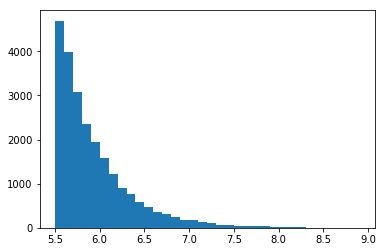

In [15]:

faixa=np.arange(5.5,9,0.1)

x = plt.hist(df["Magnitude"], bins=faixa)
plt.show()

 Pelo Histograma é possível perceber que não existem valores de magnitude menores que 5.5 computados nos dados. É possível perceber que existem muitos mais terremotos com magnitude de 5.5 até 6 do que o resto, uma vez que a área é maior. Além disso, podemos ver que, com exceção de tremores de 6.5, existem sempre menos terremotos conforme sãp observadas maiores magnitudes

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [7]:
mu=df["Magnitude"].mean()
sigma=df["Magnitude"].std()

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

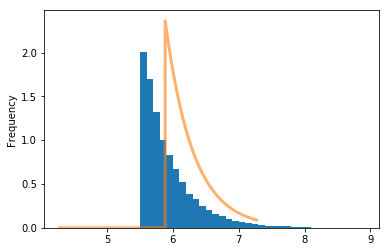

In [17]:

x=sorted(stats.norm.rvs(size=10000, loc=mu, scale=sigma))
faixa=np.arange(5.5,9,0.1)
plot = df.Magnitude.plot.hist(bins=faixa, normed=1)
plt.plot(x,stats.expon.pdf(x,loc=mu,scale=sigma),lw=3,alpha=0.6)


## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [20]:
ctab = pd.crosstab(df.Hemisfério,df.Type,margins=True,normalize=1)*100
ctab

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,45.05854,50.0,84.0,0.0,45.348539
Sul,54.94146,50.0,16.0,100.0,54.651461


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

### 45,3485 %

Explique o seu raciocínio

A probabilidade de um terremoto acontecer no Norte é 
### (Quantidade de terremotos no Norte)/(Quantidade de terremotos no mundo)
que por sua vez está representada na célula (Norte,All)

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [19]:
ctab1 = pd.crosstab(df.Hemisfério,df.Type,margins=True,normalize=0)*100
ctab1

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,98.596590,0.018838,1.384572,0.000000
Sul,99.757718,0.015631,0.218835,0.007816
All,99.231164,0.017085,0.747480,0.004271


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

### 1.384572 %


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

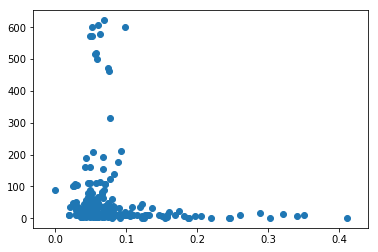

In [11]:
plt.scatter(df["Magnitude Error"],df["Depth"])

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [12]:
df['Magnitude Error'].corr(df['Depth'])

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

### Esse valor simboliza que quando Magnitude Error varia, o Depth varia inversamento e apenas 7% da variação do Magnitude Error. Essa correlação é teoricamente baixa e talvez irrelevante.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [13]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [ ]:
plot = df.Latitude.plot(kind="box")
plt.ylabel('Latitude')
plt.title("Latitude")
plt.grid()
plt.show()

plot = df.Longitude.plot(kind="box")
plt.ylabel('Longitude')
plt.title("Longitude")
plt.grid()
plt.show()

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [21]:
ctab

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,45.05854,50.0,84.0,0.0,45.348539
Sul,54.94146,50.0,16.0,100.0,54.651461


In [29]:
ctab2 = pd.crosstab(df["Hemisfério"],df["Magnitude Type"], normalize=1)*100
ctab2

Magnitude Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
Hemisfério,,,,,,,,,,
Norte,44.775326,100.0,100.0,100.0,45.005875,47.707848,45.240033,42.141471,46.153846,44.326778
Sul,55.224674,0.0,0.0,0.0,54.994125,52.292152,54.759967,57.858529,53.846154,55.673222


In [31]:
# As duas ctabs estao *100, entao ficou *1000. Dividindo por 100 volta a porcentagem

probN = (44.775326*84.0)/100
probS = (55.224674*16.0)/100

print(probN)
print(probS)

37.611273839999996
8.83594784


In [32]:
# A probabilidade é maior no Norte. 37% x 8%